# Rakuten Viki Exploratory Data Analysis



The purpose of this analysis is to gather trends and insights on the most popular shows and movies from the online video streaming service Rakuten Viki. The American website features Asian TV shows and movies from Korea, China, Taiwan, Japan and Thailand translated in over 200 languages. 

After completing the analysis, the goal is to answer the following questions:

* The distribution of movies and TV shows released by year? 
* Most featured actor/actress in TV shows? Movies?
* Is a particular genre more popular based on country?
* Which countries are producing the most popular TV shows and movies?
* Top 10 TV shows? Movies?

# 0. Import libraries

In [396]:
# import pandas, numpy, matplotlib.pyplot and seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']= 14
matplotlib.rcParams['figure.figsize']= (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# 1. Import datasets

In [43]:
#import titles.csv and credits.csv in pandas dataframe
ds_titles = pd.read_csv('titles.csv')
ds_credits = pd.read_csv('credits.csv')

# 2. Data exploration

The first wanted to answer some general questions about the dataset. ie(size, column names, datatypes, categorial and numeric data etc.)

In [44]:
#the number of rows and columns in ds_titles
print("The ds_titles dataset size is:", ds_titles.shape)

The ds_titles dataset size is: (1904, 15)


In [45]:
# names of columns
ds_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [46]:
# first 5 rows
ds_titles.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts299859,Serendipity,SHOW,NaN,1973,NaN,39,[],['XX'],1.0,tt8912714,NaN,NaN,NaN,NaN
1,ts43055,Entertainment Weekly,SHOW,This program -- one of our viewers’ favorites ...,1984,NaN,60,['reality'],['KR'],1.0,tt7782444,NaN,NaN,4.729,8.5
2,tm21196,Il Mare,MOVIE,"In the year 1999, a young woman leaves her qua...",2000,NaN,105,"['fantasy', 'scifi', 'romance', 'drama', 'docu...",['KR'],NaN,tt0282599,7.5,8777.0,10.413,7.5
3,tm8809,Fight Back to School,MOVIE,Star Chow is about to be kicked out of the Roy...,1991,NaN,100,"['comedy', 'action', 'romance']",['HK'],NaN,tt0103045,7.0,4021.0,5.616,6.6
4,ts39072,Inkigayo,SHOW,The program is a weekly music show that featur...,1998,NaN,69,"['reality', 'music']",['KR'],2.0,tt6050846,5.7,9.0,2.154,9.0


In [47]:
#last five rows
ds_titles.tail(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1899,tm1161249,Tinted With You,MOVIE,"In Korea’s feudal past, the deposed Crown Prin...",2022,NaN,92,['fantasy'],[],NaN,NaN,NaN,NaN,1.210,NaN
1900,ts296266,The Secret of Love,SHOW,Su Yi loses her memory after getting burnt in ...,2021,NaN,29,"['drama', 'romance', 'thriller']",['CN'],1.0,tt16196062,NaN,NaN,0.698,NaN
1901,ts273074,How to Be Thirty,SHOW,“How to Be Thirty” will be a relatable romance...,2021,NaN,19,"['drama', 'comedy', 'romance']",['KR'],1.0,tt14023304,6.0,80.0,7.683,7.0
1902,ts285952,Hello Mr. Gu,SHOW,A CEO with a phobia of crowds enters by accide...,2021,NaN,33,['drama'],['CN'],1.0,NaN,NaN,NaN,20.857,7.5
1903,ts300333,One Hour Left Until the First Affair,SHOW,A love omnibus drama which shows how lovers ar...,2021,NaN,24,"['drama', 'romance']",['JP'],1.0,tt16997604,NaN,NaN,3.714,NaN


In [48]:
# datatypes for each column
ds_titles.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1904 non-null   object 
 1   title                 1904 non-null   object 
 2   type                  1904 non-null   object 
 3   description           1824 non-null   object 
 4   release_year          1904 non-null   int64  
 5   age_certification     273 non-null    object 
 6   runtime               1904 non-null   int64  
 7   genres                1904 non-null   object 
 8   production_countries  1904 non-null   object 
 9   seasons               1470 non-null   float64
 10  imdb_id               1456 non-null   object 
 11  imdb_score            1370 non-null   float64
 12  imdb_votes            1370 non-null   float64
 13  tmdb_popularity       1842 non-null   float64
 14  tmdb_score            1505 non-null   float64
dtypes: float64(5), int64(

In [49]:
# descriptive statistics on numerical columns. Null values are not computed. 
ds_titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,1904.000000,1904.000000,1470.000000,1370.000000,1370.000000,1842.000000,1505.000000
mean,2016.794118,63.112920,1.239456,7.086058,1296.285401,8.718212,7.330764
std,4.442148,30.537682,1.885365,1.011513,7213.066580,15.234642,1.423521
min,1973.000000,0.000000,1.000000,1.400000,5.000000,0.069592,1.000000
25%,2015.000000,44.000000,1.000000,6.500000,48.000000,2.128000,6.600000
50%,2018.000000,60.000000,1.000000,7.300000,188.500000,4.616500,7.500000
75%,2020.000000,80.000000,1.000000,7.800000,769.500000,9.789750,8.200000
max,2022.000000,160.000000,57.000000,9.600000,208644.000000,381.236000,10.000000


In [50]:
# unique values in type column
ds_titles.type.unique()

array(['SHOW', 'MOVIE'], dtype=object)

In [51]:
#unique values in age_certification column
ds_titles.age_certification.unique()

array([nan, 'PG-13', 'R', 'TV-14', 'TV-Y', 'TV-PG', 'TV-G', 'TV-MA',
       'TV-Y7', 'G', 'PG'], dtype=object)

In [52]:
#unique values in genres column
ds_titles.genres.unique()

array(['[]', "['reality']",
       "['fantasy', 'scifi', 'romance', 'drama', 'documentation']",
       "['comedy', 'action', 'romance']", "['reality', 'music']",
       "['action', 'fantasy']", "['comedy', 'romance']",
       "['romance', 'comedy']", "['comedy', 'action', 'crime']",
       "['comedy', 'drama', 'romance']",
       "['fantasy', 'drama', 'romance']",
       "['comedy', 'drama', 'romance', 'action']",
       "['thriller', 'drama', 'action', 'crime']",
       "['crime', 'drama', 'thriller', 'action', 'european']",
       "['drama', 'comedy', 'romance']",
       "['scifi', 'comedy', 'drama', 'fantasy', 'romance']",
       "['comedy', 'reality']", "['drama', 'comedy', 'music', 'romance']",
       "['drama', 'comedy', 'history', 'romance']",
       "['drama', 'romance', 'history']",
       "['action', 'drama', 'history']", "['drama', 'romance']",
       "['documentation', 'history']", "['drama', 'history', 'romance']",
       "['drama']", "['comedy', 'drama', 'romance', 'fanta

In [53]:
#unique values in production_countries column
ds_titles.production_countries.unique()

array(["['XX']", "['KR']", "['HK']", "['MY']", "['TW']", "['FR', 'GB']",
       "['US']", "['CN']", "['AU']", "['BE']", "['HK', 'CN']", "['JP']",
       "['GB']", '[]', "['TW', 'CN']", "['DE', 'GB']",
       "['FR', 'TH', 'US']", "['CN', 'HK', 'TW']", "['IT']",
       "['KR', 'CN']", "['CN', 'HK']", "['CN', 'KR']", "['CN', 'FR']",
       "['MY', 'HK']", "['VN']", "['DE']", "['NC', 'KR']", "['TH']",
       "['IE']", "['CN', 'JP']", "['JP', 'VN']", "['HK', 'JP', 'CN']",
       "['PH']", "['FR', 'KR']", "['IT', 'CN']", "['MO']", "['TR']",
       "['KR', 'TH']", "['CA']", "['TH', 'CN']", "['AU', 'CN']",
       "['PH', 'US']", "['KR', 'NC']", "['CA', 'US']", "['BR']"],
      dtype=object)

In [54]:
# number of null values per column
ds_titles.isnull().sum()

id                         0
title                      0
type                       0
description               80
release_year               0
age_certification       1631
runtime                    0
genres                     0
production_countries       0
seasons                  434
imdb_id                  448
imdb_score               534
imdb_votes               534
tmdb_popularity           62
tmdb_score               399
dtype: int64

In [55]:
# percentage of missing values by column
ds_titles.isnull().mean()*100

id                       0.000000
title                    0.000000
type                     0.000000
description              4.201681
release_year             0.000000
age_certification       85.661765
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 22.794118
imdb_id                 23.529412
imdb_score              28.046218
imdb_votes              28.046218
tmdb_popularity          3.256303
tmdb_score              20.955882
dtype: float64

Now I will look at the credits.csv dataset.

In [56]:
# the number of rows and columns
print("The ds_credits dataset size is:", ds_credits.shape)

The ds_credits dataset size is: (19466, 5)


In [57]:
# names of columns
ds_credits.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [58]:
# first 5 rows
ds_credits.head(5)

,person_id,id,name,character,role
0,39720,tm21196,Jun Ji-hyun,Kim Eun-ju,ACTOR
1,45833,tm21196,Lee Jung-jae,Han Sung-hyun,ACTOR
2,247394,tm21196,Kim Mu-saeng,Professor Han,ACTOR
3,247395,tm21196,Jo Seung-yeon,Jae-hyeok,ACTOR
4,247396,tm21196,Min Yun-jae,NaN,ACTOR


In [59]:
# last 5 rows
ds_credits.tail(5)

,person_id,id,name,character,role
19461,174353,ts300333,Asami Usuda,NaN,ACTOR
19462,332792,ts300333,Riku Hagiwara,NaN,ACTOR
19463,969506,ts300333,Mai Kiryu,NaN,ACTOR
19464,272029,ts300333,Akiko Ohku,NaN,DIRECTOR
19465,189074,ts300333,Ryosuke Hashiguchi,NaN,DIRECTOR


In [60]:
# unique values in role column
ds_credits.role.unique()

array(['ACTOR', 'DIRECTOR'], dtype=object)

In [61]:
# number of null values per column
ds_credits.isnull().sum()

person_id       0
id              0
name            0
character    3201
role            0
dtype: int64

#### *Summary from data exploration*
* The ds_titles dataset contains 1904 rows and 15 columns.
* The ds_credits dataset contains 19466 rows and 5 columns.
* The datasets contain object, float and integer datatypes.
* The 'type' column in ds_titles dataset has two categorical values: 'Movie' and 'Show'.
* The 'role' column in ds_credits dataset has two categorical values: 'Actor' and 'Director'.
* The movie and show release years range from 1973-2022.
* The production_countries column have multiple values, even from non-Asian countries including the United States, France, Britain, Australia and Italy.
* The genres and production_countries columns had multiple values that will have to be separated into separate columns.
* The null values are represented as '[]' or 'NaN'.
* 85% of the age_certification column is missing data.
* The 'id'columns appear in both datasets representing by the unique show/movie. Will use column to merge two datasets together for further analysis. 

# 3. Data cleaning


From exploring the data, I mainly wanted to concentrate my efforts on the genre and production_countries columns. In the genre column, some shows/movies had multiple genres in one column (the most was 7 genres for one show) separated by apostrophes and commas.  I wanted one genre per column, so I could query dataset more efficiently. I choose to clean the data in a spreadsheet instead of python to utilize the split column feature. 
    The title.csv and credits.csv files were cleaned using Google Sheets. Originally, both csv files were imported into Microsoft Excel, but some show and movie titles did not import correctly due to being titled in their original language. Google Sheet was able to format titles in their respective languages. Inserted 20 extra columns to right of genre column. Used split column with an apostrophe delimiter to separate brackets, commas and genres in separate columns. Deleted the columns with brackets and commas. I scrolled through each column to make sure I didn’t accidentally delete any genres. Renamed the 6 extra columns as subgenre_1, subgenre_2…etc. 
    I also noticed the credits.csv file had 19467 rows as compared to the 1905 rows in the titles_csv. Upon further inspection, each actor/director was added in a separate row, so multiple results for one show. I also used find and replace to remove empty brackets in genre and production columns.

 

#### *Summary from data cleaning*
 
* Used Google Sheets to separate 'genre' and 'production_countries' columns individually.
* Deleted 'character' column from credits.csv file. 
* Deleted 'description', 'imdb_id' and 'age_certification' from titles.csv.


# 4. Data analysis

After cleaning the data, I reimported the new datasets in pandas to query in order to answer questions.

In [83]:
#import cleaned titles.csv and credits.csv in pandas dataframe
titles_clean = pd.read_csv('titles_clean - titles.csv')
credits_clean = pd.read_csv('credits_clean - credits.csv')

In [84]:
#first 5 rows in titles_clean
titles_clean.head()

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,subgenre_7,production_countries,pc_2,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts299859,Serendipity,SHOW,NaN,1973,39,NaN,NaN,NaN,NaN,...,NaN,XX,NaN,NaN,1.0,tt8912714,NaN,NaN,NaN,NaN
1,ts43055,Entertainment Weekly,SHOW,This program -- one of our viewers’ favorites ...,1984,60,reality,NaN,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,tt7782444,NaN,NaN,4.729,8.5
2,tm21196,Il Mare,MOVIE,"In the year 1999, a young woman leaves her qua...",2000,105,fantasy,scifi,romance,drama,...,NaN,KR,NaN,NaN,NaN,tt0282599,7.5,8777.0,10.413,7.5
3,tm8809,Fight Back to School,MOVIE,Star Chow is about to be kicked out of the Roy...,1991,100,comedy,action,romance,NaN,...,NaN,HK,NaN,NaN,NaN,tt0103045,7.0,4021.0,5.616,6.6
4,ts39072,Inkigayo,SHOW,The program is a weekly music show that featur...,1998,69,reality,music,NaN,NaN,...,NaN,KR,NaN,NaN,2.0,tt6050846,5.7,9.0,2.154,9.0


In [85]:
#last 5 rows in titles_clean
titles_clean.tail()

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,subgenre_7,production_countries,pc_2,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1899,tm1161249,Tinted With You,MOVIE,"In Korea’s feudal past, the deposed Crown Prin...",2022,92,fantasy,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.210,NaN
1900,ts296266,The Secret of Love,SHOW,Su Yi loses her memory after getting burnt in ...,2021,29,drama,romance,thriller,NaN,...,NaN,CN,NaN,NaN,1.0,tt16196062,NaN,NaN,0.698,NaN
1901,ts273074,How to Be Thirty,SHOW,“How to Be Thirty” will be a relatable romance...,2021,19,drama,comedy,romance,NaN,...,NaN,KR,NaN,NaN,1.0,tt14023304,6.0,80.0,7.683,7.0
1902,ts285952,Hello Mr. Gu,SHOW,A CEO with a phobia of crowds enters by accide...,2021,33,drama,NaN,NaN,NaN,...,NaN,CN,NaN,NaN,1.0,NaN,NaN,NaN,20.857,7.5
1903,ts300333,One Hour Left Until the First Affair,SHOW,A love omnibus drama which shows how lovers ar...,2021,24,drama,romance,NaN,NaN,...,NaN,JP,NaN,NaN,1.0,tt16997604,NaN,NaN,3.714,NaN


In [86]:
#first 5 rows in credits_clean
credits_clean.head()

,person_id,id,name,role
0,39720,tm21196,Jun Ji-hyun,ACTOR
1,45833,tm21196,Lee Jung-jae,ACTOR
2,247394,tm21196,Kim Mu-saeng,ACTOR
3,247395,tm21196,Jo Seung-yeon,ACTOR
4,247396,tm21196,Min Yun-jae,ACTOR


In [87]:
#last 5 rows in credits_clean
credits_clean.tail()

,person_id,id,name,role
19461,174353,ts300333,Asami Usuda,ACTOR
19462,332792,ts300333,Riku Hagiwara,ACTOR
19463,969506,ts300333,Mai Kiryu,ACTOR
19464,272029,ts300333,Akiko Ohku,DIRECTOR
19465,189074,ts300333,Ryosuke Hashiguchi,DIRECTOR


In [106]:
#average imdb scores and tmdb scores per genre
avg_score=titles_clean.groupby('genre')[['imdb_score', 'tmdb_score']].mean()

In [107]:
avg_score

,imdb_score,tmdb_score
genre,,
action,7.053409,7.430208
animation,6.600000,8.100000
comedy,6.871937,7.165414
crime,6.860784,7.328846
documentation,7.260000,6.266667
drama,7.275078,7.427914
family,6.800000,7.618182
fantasy,6.265854,6.862500
history,8.100000,10.000000


In [185]:
titles_clean.sort_values(by = ['title', 'imdb_score'], ascending=[True, False], inplace=True)

In [190]:
titles_clean[['title', 'imdb_score']].head(10)

,title,imdb_score
1004,.,NaN
938,.,NaN
78,1 Night 2 Days,8.3
743,100 Days My Prince,7.8
1391,17.3 about a sex,8.3
1046,2017 KBS Drama Awards,NaN
1017,2017 KBS Song Festival,NaN
1052,2017 MBC Drama Awards,NaN
917,2017 MBC Entertainment Awards,NaN
1038,2017 MBC Music Festival,NaN


In [191]:
#Top imdb shows and movies 
titles_clean.nlargest(10, 'imdb_score')

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,subgenre_7,production_countries,pc_2,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1353,ts272065,WayVision,SHOW,The WayV members are next up to star in their ...,2020,47,reality,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,tt13405130,9.6,12.0,0.600,8.0
779,ts77603,Oh My General,SHOW,The drama tells of the peculiar love story bet...,2017,44,comedy,NaN,NaN,NaN,...,NaN,CN,NaN,NaN,1.0,tt17005906,9.5,6.0,2.155,8.4
1175,ts222868,Because I Want to Talk,SHOW,Becoming a talk show host was one of Lee Dong ...,2019,60,NaN,NaN,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,tt15174364,9.3,17.0,3.414,NaN
1437,ts254856,MTopia,SHOW,"The 7 members from SuperM eat, play, and heal ...",2020,60,reality,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,tt13405134,9.3,18.0,0.876,NaN
1190,ts223243,Jung Hae In's Travel Log,SHOW,Actor Jung Hae In becomes the producer of a do...,2019,63,reality,NaN,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,tt16156984,9.2,20.0,4.002,10.0
682,ts78298,My Mister,SHOW,"In a world that is less than kind, a young wom...",2018,79,drama,family,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,tt7923710,9.2,5481.0,14.997,8.9
431,ts37660,Reply 1988,SHOW,A nostalgic trip back to the late 1980s throug...,2015,95,comedy,drama,family,romance,...,NaN,KR,NaN,NaN,1.0,tt5182866,9.2,6557.0,15.317,8.7
706,ts77742,Mother,SHOW,A young girl named Hye-Na is abused by her mot...,2018,63,drama,NaN,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,tt9341944,9.1,620.0,14.563,8.5
1684,ts312152,Ms. Cupid in Love,SHOW,Sharing a desire to save the world's marriages...,2022,39,scifi,comedy,drama,fantasy,...,NaN,CN,NaN,NaN,1.0,tt18353142,9.1,13.0,6.152,NaN
19,ts21512,Running Man,SHOW,"These days, variety entertainment is gradually...",2010,83,comedy,reality,NaN,NaN,...,NaN,KR,NaN,NaN,8.0,tt2185037,9.1,3068.0,74.267,8.5


In [366]:
#Top tmdb shows and movies 
titles_clean.nlargest(10, 'tmdb_score')

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,subgenre_7,production_countries,pc_2,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
871,ts83912,All Out of Love,SHOW,Can you fight through your emotions when you k...,2018,45,drama,romance,european,NaN,...,NaN,CN,NaN,NaN,2.0,tt0229906,6.4,23.0,8.436,10.0
1833,ts297139,Be Together,SHOW,Four female friends and former classmates – Xi...,2021,45,comedy,drama,romance,NaN,...,NaN,CN,NaN,NaN,1.0,tt15000762,8.0,8.0,23.631,10.0
1440,ts222798,Best Mistake,SHOW,"The story focuses on Yun Doo, a studious, norm...",2019,16,drama,comedy,romance,NaN,...,NaN,KR,NaN,NaN,3.0,tt11997412,6.6,108.0,19.688,10.0
73,ts32357,Capital Scandal,SHOW,Capital Scandal is a 2007 South Korean televis...,2007,68,drama,comedy,romance,NaN,...,NaN,KR,NaN,NaN,1.0,tt6026108,8.1,79.0,2.505,10.0
1354,ts251539,Consummation,SHOW,"When a VR game conjures up a realistic dream, ...",2020,44,drama,romance,scifi,NaN,...,NaN,CN,NaN,NaN,1.0,tt12740282,NaN,NaN,8.219,10.0
1563,ts226422,Dr. Cutie,SHOW,To seek revenge Tian Qi enters the palace disg...,2020,45,history,romance,comedy,drama,...,NaN,CN,NaN,NaN,1.0,tt11384070,8.1,85.0,10.156,10.0
1073,ts83775,Eat in Style,SHOW,Celebrities look for local ingredients that ar...,2018,80,family,documentation,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,NaN,NaN,NaN,2.322,10.0
1297,ts226548,En of Love: TOSSARA,SHOW,Gun Tossakan is a very bright and tall medical...,2020,32,drama,NaN,NaN,NaN,...,NaN,TH,NaN,NaN,2.0,NaN,NaN,NaN,0.600,10.0
1187,ts269091,Fate,SHOW,"Five years ago, Xia Ran Ran was an ugly duckli...",2020,44,drama,NaN,NaN,NaN,...,NaN,CN,NaN,NaN,1.0,NaN,NaN,NaN,8.336,10.0
671,ts57448,Fifteen Years to Wait for Migratory Birds,SHOW,"On the first day of junior high, 13 year old L...",2016,46,drama,romance,NaN,NaN,...,NaN,CN,NaN,NaN,1.0,tt6970636,7.6,26.0,4.543,10.0


Around **77%** of the data is TV shows, while **22%** is movies.

In [367]:
#percentage of shows and movies
titles_clean['type'].value_counts(normalize=True)

SHOW     0.772059
MOVIE    0.227941
Name: type, dtype: float64

In [380]:
#counts per genre
grouped = titles_clean['genre'].value_counts()


In [381]:
grouped

drama            837
comedy           301
romance          125
action           106
scifi            105
reality           78
thriller          67
crime             55
fantasy           51
documentation     16
family            13
war               11
horror             5
music              3
animation          3
history            2
Name: genre, dtype: int64

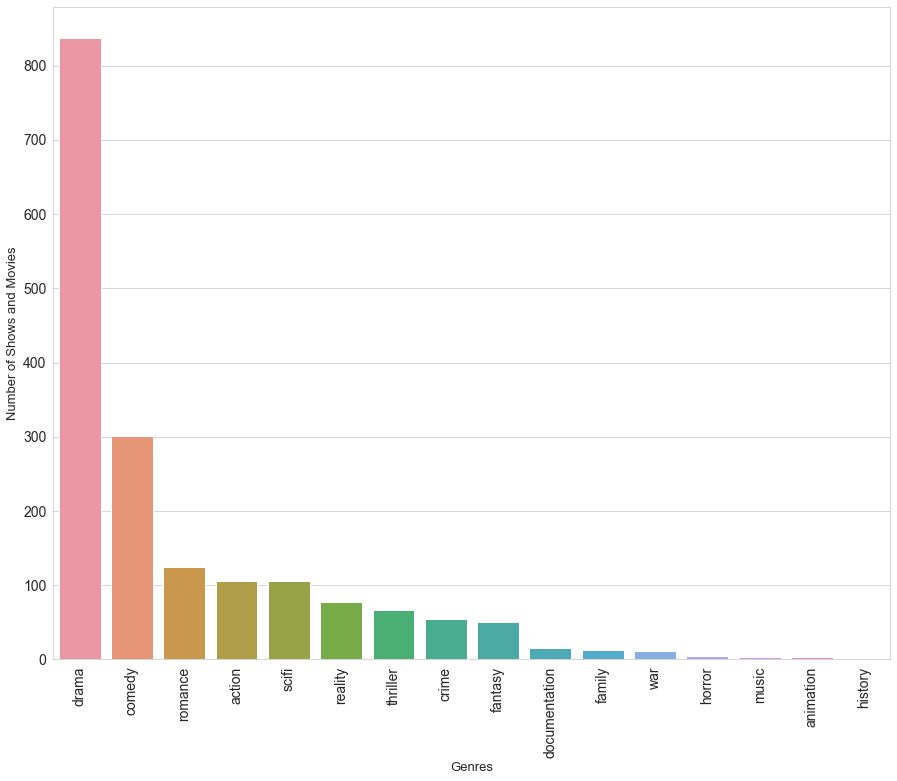

In [397]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)

plt.ylabel('Number of Shows and Movies', fontsize=13)
plt.xlabel('Genres', fontsize=13)
plt.show()

In [202]:
#broken down by percentage
titles_clean['genre'].value_counts(normalize=True)

drama            0.470754
comedy           0.169291
romance          0.070304
action           0.059618
scifi            0.059055
reality          0.043870
thriller         0.037683
crime            0.030934
fantasy          0.028684
documentation    0.008999
family           0.007312
war              0.006187
horror           0.002812
music            0.001687
animation        0.001687
history          0.001125
Name: genre, dtype: float64

In [209]:
#counts of shows/movies by country
titles_clean['production_countries'].value_counts()

KR        1017
CN         459
JP         112
TW          74
HK          28
US          27
TH          15
VN           7
CA           5
XX           4
AU           3
FR           3
GB           3
DE           2
PH           2
IT           2
BE           1
NC           1
BR           1
HK, CN       1
IE           1
MO           1
TR           1
MY,          1
MY           1
Name: production_countries, dtype: int64

**57%** of the TV shows and movies are produced in **Korea**.

In [264]:
#percentage of shows/movies produced by country
titles_clean['production_countries'].value_counts(normalize=True)

KR        0.573928
CN        0.259029
JP        0.063205
TW        0.041761
HK        0.015801
US        0.015237
TH        0.008465
VN        0.003950
CA        0.002822
XX        0.002257
AU        0.001693
FR        0.001693
GB        0.001693
DE        0.001129
PH        0.001129
IT        0.001129
BE        0.000564
NC        0.000564
BR        0.000564
HK, CN    0.000564
IE        0.000564
MO        0.000564
TR        0.000564
MY,       0.000564
MY        0.000564
Name: production_countries, dtype: float64

In [561]:
hm=titles_clean.groupby(['genre'])[['imdb_score','tmdb_score']].mean()

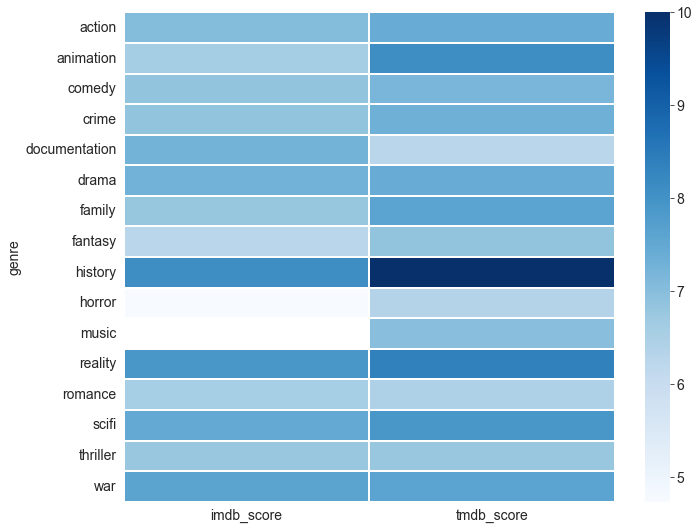

In [562]:
fig, ax = plt.subplots(figsize=(11,9))
sns.heatmap(data=hm, cmap="Blues", linewidth=0.3)
plt.show()

In [212]:
#grouping dataframe by countries
pd_countries=titles_clean.groupby(['production_countries'])

In [214]:
#dataframe for Korea
# OR filt = titles_clean['production_countries'] == 'KR'
#titles_clean.loc[filt]
pd_countries.get_group('KR')

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,subgenre_7,production_countries,pc_2,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
78,ts16192,1 Night 2 Days,SHOW,2 Days & 1 Night is a South Korean reality-var...,2007,85,reality,family,comedy,NaN,...,NaN,KR,NaN,NaN,5.0,tt3247300,8.3,227.0,40.415,7.4
743,ts83359,100 Days My Prince,SHOW,Lee Yool falls off a cliff and nearly dies in ...,2018,75,drama,thriller,comedy,history,...,NaN,KR,NaN,NaN,1.0,tt8199972,7.8,1938.0,14.871,8.3
1400,ts88135,2019 Idol Star Athletics Championships,SHOW,The Idol Star Athletics Championships is back ...,2019,52,NaN,NaN,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,NaN,NaN,NaN,0.600,NaN
1831,ts317048,2021 Changwon K-Pop World Festival,SHOW,NaN,2021,102,reality,NaN,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,NaN,NaN,NaN,0.739,NaN
912,ts75690,20th Century Boy and Girl,SHOW,The heartwarming romantic comedy is about the ...,2017,30,comedy,romance,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,tt7208216,7.0,120.0,5.978,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,ts283651,아무튼 출근!,SHOW,NaN,2021,1,reality,NaN,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,NaN,NaN,NaN,2.096,9.0
838,ts270015,애나야 밥먹자,SHOW,NaN,2017,13,drama,NaN,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,NaN,NaN,NaN,1.260,NaN
1419,ts322264,최애 엔터테인먼트,SHOW,NaN,2020,66,NaN,NaN,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,NaN,NaN,NaN,0.600,NaN
1586,ts319049,카페 킬리만자로,SHOW,NaN,2020,14,NaN,NaN,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,NaN,NaN,NaN,0.600,NaN


In [216]:
#top genres in Korea
filt = titles_clean['production_countries'] == 'KR'
titles_clean.loc[filt]['genre'].value_counts()

drama            447
comedy           174
reality           62
scifi             59
action            53
romance           50
thriller          41
crime             37
fantasy           21
war                8
documentation      8
family             5
horror             3
music              1
history            1
animation          1
Name: genre, dtype: int64

Top 5 genres in **Korea** are **drama, comedy, reality, sci-fi** and **action**. 

In [385]:
#top genres in Korea
korea_genres = pd_countries['genre'].value_counts().loc['KR']

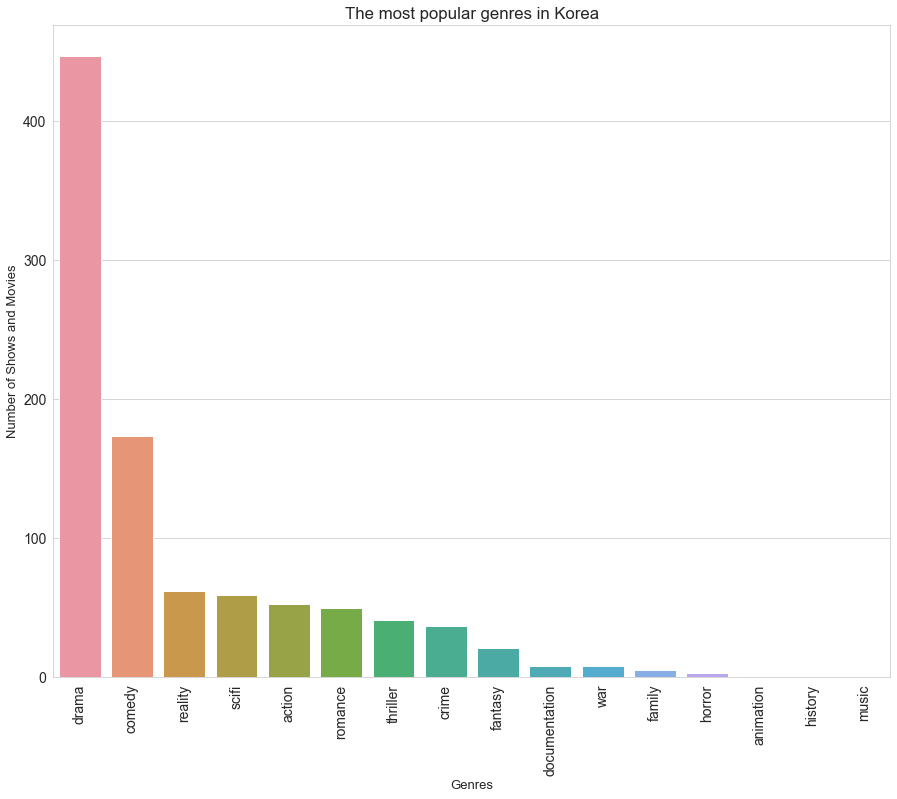

In [576]:
korea_genres
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(korea_genres.index, korea_genres.values)

plt.ylabel('Number of Shows and Movies', fontsize=13)
plt.xlabel('Genres', fontsize=13)
plt.title("The most popular genres in Korea")
plt.show()

The top 5 genres in **China** are **drama, comedy, action, sci-fi** and **romance**. 

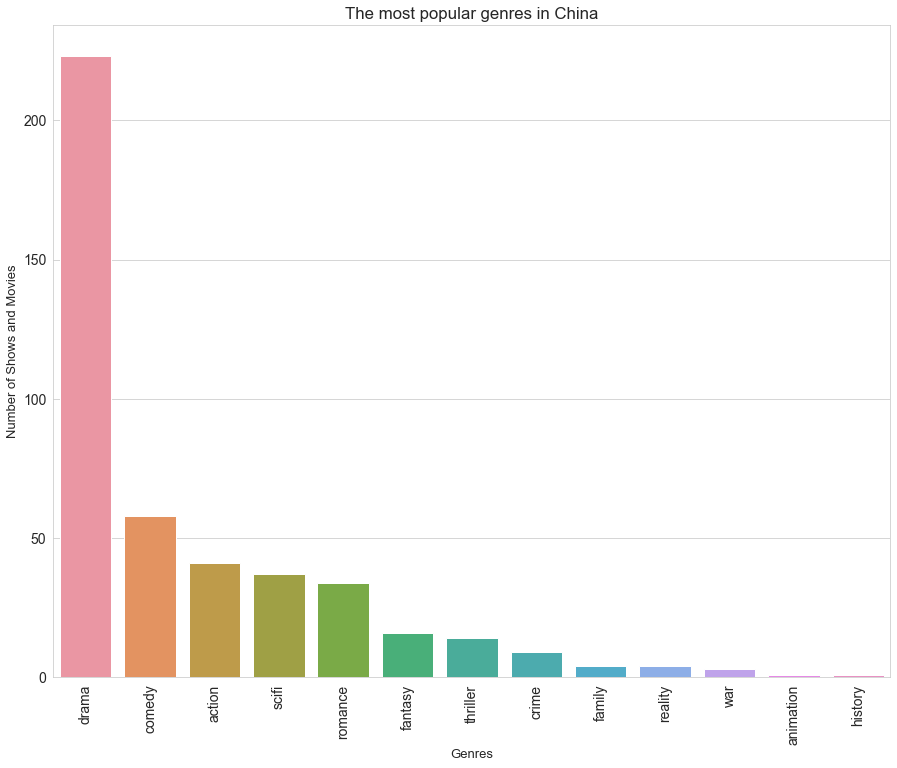

In [575]:
#top genres in China
china_genres = pd_countries['genre'].value_counts().loc['CN']
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(china_genres.index, china_genres.values)

plt.ylabel('Number of Shows and Movies', fontsize=13)
plt.xlabel('Genres', fontsize=13)
plt.title("The most popular genres in China")
plt.show()

The top 5 genres in **Japan** are **drama, comedy, romance, thriller** and **action**.

In [394]:
#top genres in Japan
japan_genres = pd_countries['genre'].value_counts().loc['JP']

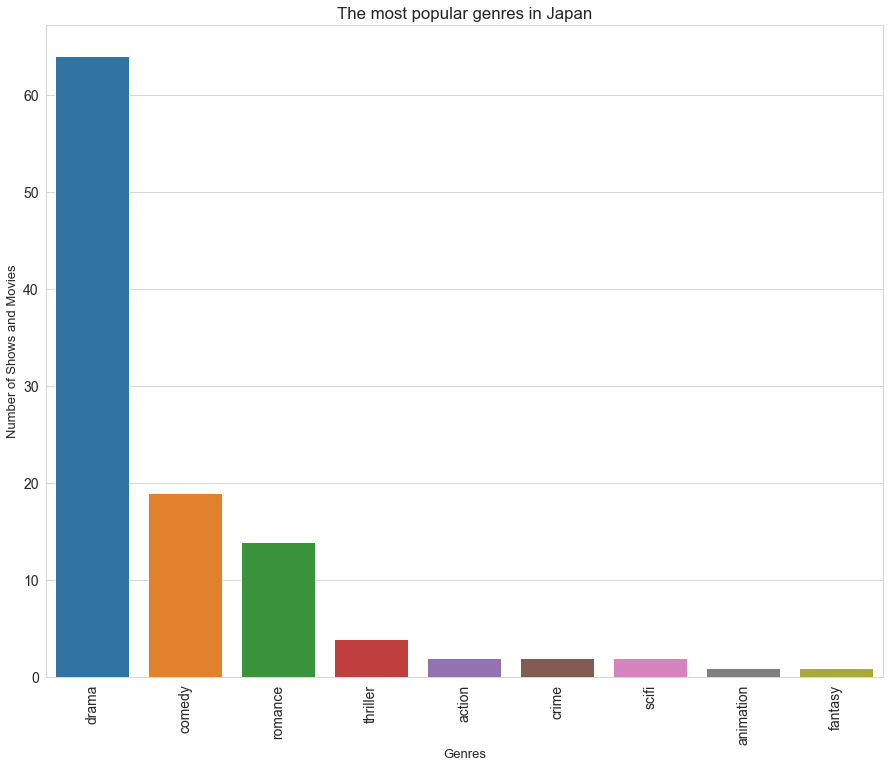

In [574]:
japan_genres
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(japan_genres.index, japan_genres.values)

plt.ylabel('Number of Shows and Movies', fontsize=13)
plt.xlabel('Genres', fontsize=13)
plt.title("The most popular genres in Japan")
plt.show()

In [245]:
#dataframe for shows
show_df= titles_clean[(titles_clean['type']== 'SHOW')]

In [246]:
show_df

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,subgenre_7,production_countries,pc_2,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1004,ts86925,.,SHOW,The 2018 MBC Gayo Daejejeon will be held on De...,2018,98,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.891,NaN
938,ts77601,.,SHOW,"In November 23, SBS confirmed that You Hee-Yeo...",2017,84,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.600,NaN
78,ts16192,1 Night 2 Days,SHOW,2 Days & 1 Night is a South Korean reality-var...,2007,85,reality,family,comedy,NaN,...,NaN,KR,NaN,NaN,5.0,tt3247300,8.3,227.0,40.415,7.4
743,ts83359,100 Days My Prince,SHOW,Lee Yool falls off a cliff and nearly dies in ...,2018,75,drama,thriller,comedy,history,...,NaN,KR,NaN,NaN,1.0,tt8199972,7.8,1938.0,14.871,8.3
1391,ts254027,17.3 about a sex,SHOW,"""The world average age for the first sexual ex...",2020,29,drama,NaN,NaN,NaN,...,NaN,JP,NaN,NaN,1.0,tt15576586,8.3,11.0,12.738,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,ts322264,최애 엔터테인먼트,SHOW,NaN,2020,66,NaN,NaN,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,NaN,NaN,NaN,0.600,NaN
1178,ts311662,추석특집 - 라면 당기는 시간,SHOW,NaN,2020,68,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.600,NaN
1586,ts319049,카페 킬리만자로,SHOW,NaN,2020,14,NaN,NaN,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,NaN,NaN,NaN,0.600,NaN
1838,ts310166,한 번쯤 멈출 수밖에,SHOW,NaN,2022,49,documentation,NaN,NaN,NaN,...,NaN,KR,NaN,NaN,2.0,NaN,NaN,NaN,0.896,NaN


In [429]:
av=show_df.groupby('title')[['imdb_score','tmdb_score']].mean()

In [449]:
#Top ranked TV shows (imdb/tmdb average)
av
av.mean(axis=1).sort_values(ascending=False).head(10)


title
Eat in Style                    10.0
My Fated Boy                    10.0
Wait in Beijing                 10.0
First Romance                   10.0
Song Ji Hyo's Beautiful Life    10.0
Fate                            10.0
Love Under the Moon             10.0
When We Write Love Story        10.0
Simply K-Pop                    10.0
Goodbye, My Love                10.0
dtype: float64

In [251]:
#top 10 rated shows for imdb
show_df.nlargest(10, 'imdb_score')

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,subgenre_7,production_countries,pc_2,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1353,ts272065,WayVision,SHOW,The WayV members are next up to star in their ...,2020,47,reality,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,tt13405130,9.6,12.0,0.600,8.0
779,ts77603,Oh My General,SHOW,The drama tells of the peculiar love story bet...,2017,44,comedy,NaN,NaN,NaN,...,NaN,CN,NaN,NaN,1.0,tt17005906,9.5,6.0,2.155,8.4
1175,ts222868,Because I Want to Talk,SHOW,Becoming a talk show host was one of Lee Dong ...,2019,60,NaN,NaN,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,tt15174364,9.3,17.0,3.414,NaN
1437,ts254856,MTopia,SHOW,"The 7 members from SuperM eat, play, and heal ...",2020,60,reality,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,tt13405134,9.3,18.0,0.876,NaN
1190,ts223243,Jung Hae In's Travel Log,SHOW,Actor Jung Hae In becomes the producer of a do...,2019,63,reality,NaN,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,tt16156984,9.2,20.0,4.002,10.0
682,ts78298,My Mister,SHOW,"In a world that is less than kind, a young wom...",2018,79,drama,family,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,tt7923710,9.2,5481.0,14.997,8.9
431,ts37660,Reply 1988,SHOW,A nostalgic trip back to the late 1980s throug...,2015,95,comedy,drama,family,romance,...,NaN,KR,NaN,NaN,1.0,tt5182866,9.2,6557.0,15.317,8.7
706,ts77742,Mother,SHOW,A young girl named Hye-Na is abused by her mot...,2018,63,drama,NaN,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,tt9341944,9.1,620.0,14.563,8.5
1684,ts312152,Ms. Cupid in Love,SHOW,Sharing a desire to save the world's marriages...,2022,39,scifi,comedy,drama,fantasy,...,NaN,CN,NaN,NaN,1.0,tt18353142,9.1,13.0,6.152,NaN
19,ts21512,Running Man,SHOW,"These days, variety entertainment is gradually...",2010,83,comedy,reality,NaN,NaN,...,NaN,KR,NaN,NaN,8.0,tt2185037,9.1,3068.0,74.267,8.5


In [265]:
#top 10 rated shows on tmdb
show_df.nlargest(10, 'tmdb_score')

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,subgenre_7,production_countries,pc_2,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
871,ts83912,All Out of Love,SHOW,Can you fight through your emotions when you k...,2018,45,drama,romance,european,NaN,...,NaN,CN,NaN,NaN,2.0,tt0229906,6.4,23.0,8.436,10.0
1833,ts297139,Be Together,SHOW,Four female friends and former classmates – Xi...,2021,45,comedy,drama,romance,NaN,...,NaN,CN,NaN,NaN,1.0,tt15000762,8.0,8.0,23.631,10.0
1440,ts222798,Best Mistake,SHOW,"The story focuses on Yun Doo, a studious, norm...",2019,16,drama,comedy,romance,NaN,...,NaN,KR,NaN,NaN,3.0,tt11997412,6.6,108.0,19.688,10.0
73,ts32357,Capital Scandal,SHOW,Capital Scandal is a 2007 South Korean televis...,2007,68,drama,comedy,romance,NaN,...,NaN,KR,NaN,NaN,1.0,tt6026108,8.1,79.0,2.505,10.0
1354,ts251539,Consummation,SHOW,"When a VR game conjures up a realistic dream, ...",2020,44,drama,romance,scifi,NaN,...,NaN,CN,NaN,NaN,1.0,tt12740282,NaN,NaN,8.219,10.0
1563,ts226422,Dr. Cutie,SHOW,To seek revenge Tian Qi enters the palace disg...,2020,45,history,romance,comedy,drama,...,NaN,CN,NaN,NaN,1.0,tt11384070,8.1,85.0,10.156,10.0
1073,ts83775,Eat in Style,SHOW,Celebrities look for local ingredients that ar...,2018,80,family,documentation,NaN,NaN,...,NaN,KR,NaN,NaN,1.0,NaN,NaN,NaN,2.322,10.0
1297,ts226548,En of Love: TOSSARA,SHOW,Gun Tossakan is a very bright and tall medical...,2020,32,drama,NaN,NaN,NaN,...,NaN,TH,NaN,NaN,2.0,NaN,NaN,NaN,0.600,10.0
1187,ts269091,Fate,SHOW,"Five years ago, Xia Ran Ran was an ugly duckli...",2020,44,drama,NaN,NaN,NaN,...,NaN,CN,NaN,NaN,1.0,NaN,NaN,NaN,8.336,10.0
671,ts57448,Fifteen Years to Wait for Migratory Birds,SHOW,"On the first day of junior high, 13 year old L...",2016,46,drama,romance,NaN,NaN,...,NaN,CN,NaN,NaN,1.0,tt6970636,7.6,26.0,4.543,10.0


In [401]:
#how many shows released by year
show_year = show_df['release_year'].value_counts()

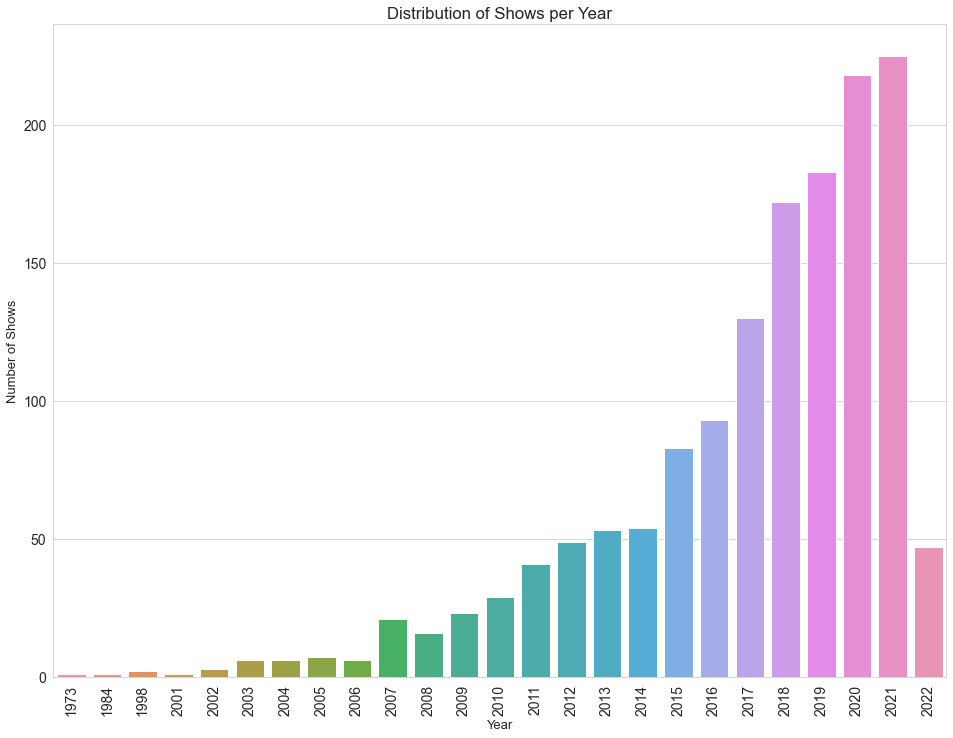

In [573]:
show_year
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(16, 12))
plt.xticks(rotation='vertical')
sns.barplot(show_year.index, show_year.values)

plt.ylabel('Number of Shows', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.title("Distribution of Shows per Year")
plt.show()

In [247]:
#dataframe for movies
movie_df= titles_clean[(titles_clean['type']== 'MOVIE')]

In [248]:
movie_df

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,subgenre_7,production_countries,pc_2,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1059,tm439261,60 Days of Summer,MOVIE,An old man has trouble connecting with his you...,2018,94,thriller,drama,NaN,NaN,...,NaN,KR,NaN,NaN,NaN,tt9174108,6.3,27.0,0.600,8.0
610,tm308125,708090,MOVIE,"Zhao Yuanyuan (starring Irene Wan), irrevocabl...",2016,90,drama,NaN,NaN,NaN,...,NaN,XX,NaN,NaN,NaN,tt6419616,7.3,27.0,0.743,6.0
175,tm48275,A Company Man,MOVIE,A contract killer becomes disenchanted with hi...,2012,96,drama,action,thriller,crime,...,NaN,KR,NaN,NaN,NaN,tt2371486,6.6,5867.0,12.311,6.9
373,tm960805,A Complete Life,MOVIE,NaN,2013,93,drama,romance,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,tt13029542,NaN,NaN,NaN,NaN
945,tm437657,A Cool Fish,MOVIE,Cop-turned-security guard Ma Xianyong finds hi...,2018,108,thriller,comedy,NaN,NaN,...,NaN,CN,NaN,NaN,NaN,tt9282616,6.9,1663.0,3.076,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,tm316517,Zodiac 12: Five Steps of Love,MOVIE,"Huy is a Sagittarius playboy, fun-loving and a...",2015,99,comedy,romance,drama,NaN,...,NaN,VN,NaN,NaN,NaN,tt6448304,6.6,42.0,0.631,6.0
1204,tm849783,his,MOVIE,Two boys met and fell in love with each other ...,2020,127,romance,NaN,NaN,NaN,...,NaN,JP,NaN,NaN,NaN,NaN,NaN,NaN,3.179,7.7
1840,tm1028487,replay,MOVIE,An experimental student film exploring human l...,2021,2,fantasy,NaN,NaN,NaN,...,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,0.600,NaN
625,tm943395,盲少爺的小女僕,MOVIE,NaN,2016,0,romance,NaN,NaN,NaN,...,NaN,CN,NaN,NaN,NaN,NaN,NaN,NaN,0.600,NaN


In [446]:
av2=movie_df.groupby('title')[['imdb_score','tmdb_score']].mean()

In [448]:
#Top ranked movies (imdb/tmdb average)
av2
av2.mean(axis=1).sort_values(ascending=False).head(10)

title
Somewhere Winter         10.00
Spring Tide               9.00
Emergency Declaration     8.80
Inseparable Bros          8.50
My Lovely Angel           8.50
Show Me Your Love         8.50
Best Friend               8.40
Fatal Journey             8.30
The King's Letters        8.20
Miracle in Cell No. 7     8.15
dtype: float64

In [249]:
#top imdb movies
movie_df.nlargest(10, 'imdb_score')

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,subgenre_7,production_countries,pc_2,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1613,tm828211,Emergency Declaration,MOVIE,Veteran chief police detective In-ho receives ...,2021,147,thriller,action,drama,NaN,...,NaN,KR,NaN,NaN,NaN,tt11535228,8.6,99.0,3.413,9.0
1373,tm879448,Curtain Up!,MOVIE,A group of kids in New York's Chinatown prepar...,2020,69,comedy,family,documentation,NaN,...,NaN,US,NaN,NaN,NaN,tt11909046,8.2,13.0,1.236,8.0
1067,tm450238,Nuts,MOVIE,A coming-of-age story revolving around an ecce...,2018,98,comedy,romance,drama,NaN,...,NaN,CN,NaN,NaN,NaN,tt10443324,8.2,55.0,2.102,6.5
277,tm184274,Miracle in Cell No. 7,MOVIE,A story about a mentally ill man wrongfully ac...,2013,127,drama,comedy,NaN,NaN,...,NaN,KR,NaN,NaN,NaN,tt2659414,8.1,19920.0,16.402,8.2
673,tm299808,A Taxi Driver,MOVIE,"May, 1980. Man-seob is a taxi driver in Seoul ...",2017,137,drama,history,action,NaN,...,NaN,KR,NaN,NaN,NaN,tt6878038,7.9,22939.0,17.116,8.1
756,tm421612,Dying to Survive,MOVIE,"When a mysterious visitor appears, the life of...",2018,117,drama,comedy,NaN,NaN,...,NaN,CN,NaN,NaN,NaN,tt7362036,7.9,5875.0,9.371,8.0
1480,tm429955,Empty by Design,MOVIE,Two people find themselves back in the Philipp...,2019,86,drama,NaN,NaN,NaN,...,NaN,PH,US,NaN,NaN,tt8785442,7.9,7.0,0.600,NaN
371,tm181751,American Revolutionary: The Evolution of Grace...,MOVIE,Grace Lee Boggs is an activist and philosopher...,2013,82,documentation,NaN,NaN,NaN,...,NaN,US,NaN,NaN,NaN,tt2385558,7.8,128.0,0.600,8.0
47,tm85638,Be with You,MOVIE,"When two souls find one another, nothing can t...",2004,119,fantasy,drama,romance,NaN,...,NaN,JP,NaN,NaN,NaN,tt0442268,7.8,4749.0,9.652,7.5
1249,tm935553,The Name,MOVIE,"Ri-ae', a woman who had everything but could n...",2020,110,drama,romance,NaN,NaN,...,NaN,KR,NaN,NaN,NaN,tt16409230,7.8,9.0,1.488,6.0


In [250]:
#top tmdb movies
movie_df.nlargest(10, 'tmdb_score')

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,subgenre_7,production_countries,pc_2,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
669,tm230218,Like a French Film,MOVIE,The film introduces people who live like a Fre...,2016,104,drama,NaN,NaN,NaN,...,NaN,KR,NaN,NaN,NaN,tt6867660,6.2,29.0,2.144,10.0
593,tm288597,Show Me Your Love,MOVIE,"Told from Nin’s perspective, Show Me Your Love...",2016,120,drama,NaN,NaN,NaN,...,NaN,"MY,",HK,NaN,NaN,tt6405384,7.0,76.0,1.173,10.0
1533,tm839045,Somewhere Winter,MOVIE,When a woman chances upon a ticket to an exclu...,2019,125,romance,NaN,NaN,NaN,...,NaN,CN,NaN,NaN,NaN,NaN,NaN,NaN,1.156,10.0
1613,tm828211,Emergency Declaration,MOVIE,Veteran chief police detective In-ho receives ...,2021,147,thriller,action,drama,NaN,...,NaN,KR,NaN,NaN,NaN,tt11535228,8.6,99.0,3.413,9.0
1434,tm933427,Spring Tide,MOVIE,"A teenage girl is ready to experiment, but an ...",2020,124,drama,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.696,9.0
1357,tm470502,Win My Baby Back,MOVIE,"""Win My Baby Back"" is a perfect love story of ...",2019,102,comedy,family,romance,NaN,...,NaN,VN,NaN,NaN,NaN,tt9633264,6.1,170.0,2.127,9.0
969,tm358879,My Last Love,MOVIE,Bong-yong Kim is one of a modest Korean dad wh...,2017,111,drama,NaN,NaN,NaN,...,NaN,KR,NaN,NaN,NaN,tt7542332,6.7,63.0,1.957,8.9
1352,tm453852,"Cheer Up, Mr. Lee",MOVIE,Chul-soo is a man with an intellectual disabil...,2019,111,drama,comedy,family,NaN,...,NaN,KR,NaN,NaN,NaN,tt10925770,6.9,419.0,4.578,8.6
1295,tm445616,MAL·MO·E: The Secret Mission,MOVIE,"During the Japanese occupation of Korea, the J...",2019,135,drama,comedy,history,NaN,...,NaN,KR,NaN,NaN,NaN,tt9602258,6.8,439.0,4.238,8.6
1322,tm453968,Inseparable Bros,MOVIE,Se-ha who is a physically handicapped and Dong...,2019,114,comedy,NaN,NaN,NaN,...,NaN,KR,NaN,NaN,NaN,NaN,NaN,NaN,3.731,8.5


Peaked in **2019** with **62** movies released.

In [356]:
#Number of movies released in years
m_release = movie_df['release_year'].value_counts()

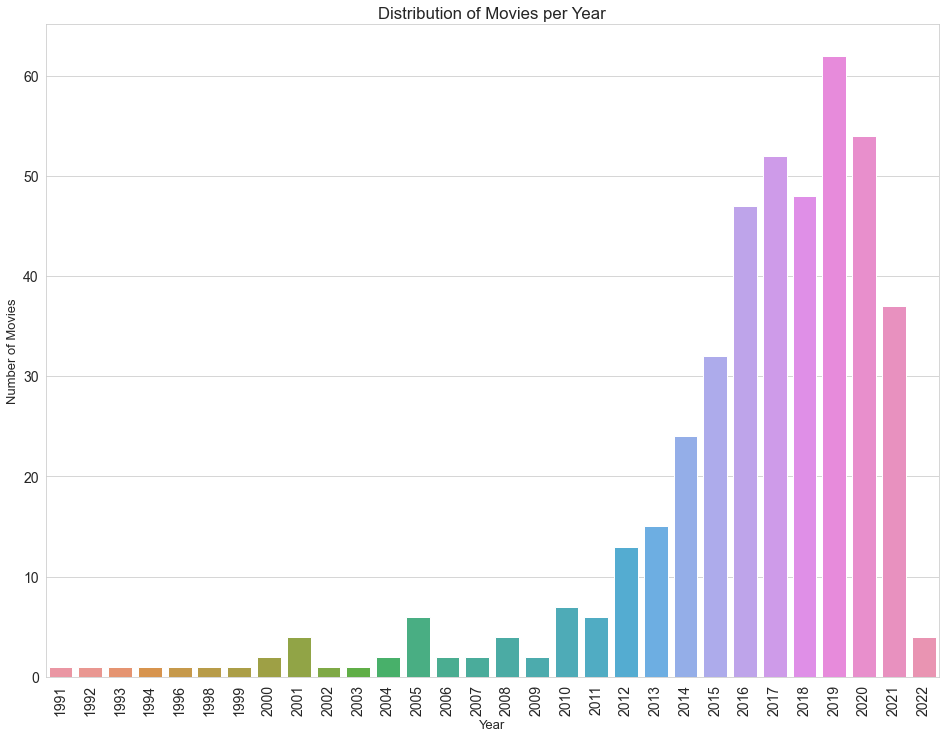

In [572]:
m_release
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(16, 12))
plt.xticks(rotation='vertical')
sns.barplot(m_release.index, m_release.values)

plt.ylabel('Number of Movies', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.title("Distribution of Movies per Year")
plt.show()

In [253]:
#number of actors/directors in role column
credits_clean['role'].value_counts()

ACTOR       17919
DIRECTOR     1547
Name: role, dtype: int64

In [284]:
#Merged titles_clean and credits_clean dataframes
combined_df = pd.merge(titles_clean, credits_clean, on= 'id', how = 'outer')

In [285]:
combined_df

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
0,ts86925,.,SHOW,The 2018 MBC Gayo Daejejeon will be held on De...,2018,98,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,0.891,NaN,NaN,NaN,NaN
1,ts77601,.,SHOW,"In November 23, SBS confirmed that You Hee-Yeo...",2017,84,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,0.600,NaN,NaN,NaN,NaN
2,ts16192,1 Night 2 Days,SHOW,2 Days & 1 Night is a South Korean reality-var...,2007,85,reality,family,comedy,NaN,...,NaN,5.0,tt3247300,8.3,227.0,40.415,7.4,273842.0,Kim Jong-min,ACTOR
3,ts16192,1 Night 2 Days,SHOW,2 Days & 1 Night is a South Korean reality-var...,2007,85,reality,family,comedy,NaN,...,NaN,5.0,tt3247300,8.3,227.0,40.415,7.4,309879.0,Moon Se-yoon,ACTOR
4,ts16192,1 Night 2 Days,SHOW,2 Days & 1 Night is a South Korean reality-var...,2007,85,reality,family,comedy,NaN,...,NaN,5.0,tt3247300,8.3,227.0,40.415,7.4,174823.0,Jeong-hun Yeon,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19597,ts319049,카페 킬리만자로,SHOW,NaN,2020,14,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,0.600,NaN,815375.0,Kwon Hyun-bin,ACTOR
19598,ts319049,카페 킬리만자로,SHOW,NaN,2020,14,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,0.600,NaN,2147611.0,Kim Gwang-eun,DIRECTOR
19599,ts310166,한 번쯤 멈출 수밖에,SHOW,NaN,2022,49,documentation,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,0.896,NaN,723588.0,Lee Sun-hee,ACTOR
19600,ts310166,한 번쯤 멈출 수밖에,SHOW,NaN,2022,49,documentation,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,0.896,NaN,1231659.0,Lee Geum-hee,ACTOR


In [288]:
#Top imdb shows
combined_df.nlargest(100, 'imdb_score')

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
18510,ts272065,WayVision,SHOW,The WayV members are next up to star in their ...,2020,47,reality,NaN,NaN,NaN,...,NaN,1.0,tt13405130,9.6,12.0,0.600,8.0,NaN,NaN,NaN
11004,ts77603,Oh My General,SHOW,The drama tells of the peculiar love story bet...,2017,44,comedy,NaN,NaN,NaN,...,NaN,1.0,tt17005906,9.5,6.0,2.155,8.4,200180.0,Ma Sichun,ACTOR
11005,ts77603,Oh My General,SHOW,The drama tells of the peculiar love story bet...,2017,44,comedy,NaN,NaN,NaN,...,NaN,1.0,tt17005906,9.5,6.0,2.155,8.4,293482.0,Peter Sheng,ACTOR
11006,ts77603,Oh My General,SHOW,The drama tells of the peculiar love story bet...,2017,44,comedy,NaN,NaN,NaN,...,NaN,1.0,tt17005906,9.5,6.0,2.155,8.4,655919.0,Zhu Yongteng,ACTOR
11007,ts77603,Oh My General,SHOW,The drama tells of the peculiar love story bet...,2017,44,comedy,NaN,NaN,NaN,...,NaN,1.0,tt17005906,9.5,6.0,2.155,8.4,684433.0,Sookie Pan,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,ts84770,An Oriental Odyssey,SHOW,Ye Yuan An is the daughter of the Assistant Mi...,2018,43,scifi,romance,action,drama,...,NaN,1.0,tt13821102,9.0,17.0,4.708,6.0,336384.0,Zhai Tianlin,ACTOR
797,ts84770,An Oriental Odyssey,SHOW,Ye Yuan An is the daughter of the Assistant Mi...,2018,43,scifi,romance,action,drama,...,NaN,1.0,tt13821102,9.0,17.0,4.708,6.0,1324396.0,Zhou Xiao Peng,DIRECTOR
10808,ts88892,Nice To Meet You,SHOW,An aspiring designer almost loses everything d...,2019,45,drama,NaN,NaN,NaN,...,NaN,1.0,tt14489236,9.0,10.0,7.004,NaN,250138.0,Janice Man,ACTOR
10809,ts88892,Nice To Meet You,SHOW,An aspiring designer almost loses everything d...,2019,45,drama,NaN,NaN,NaN,...,NaN,1.0,tt14489236,9.0,10.0,7.004,NaN,746772.0,Zhang Ming'en,ACTOR


In [289]:
#top tmdb shows
combined_df.nlargest(100, 'tmdb_score')

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
694,ts83912,All Out of Love,SHOW,Can you fight through your emotions when you k...,2018,45,drama,romance,european,NaN,...,NaN,2.0,tt0229906,6.4,23.0,8.436,10.0,191945.0,Ma Tianyu,ACTOR
695,ts83912,All Out of Love,SHOW,Can you fight through your emotions when you k...,2018,45,drama,romance,european,NaN,...,NaN,2.0,tt0229906,6.4,23.0,8.436,10.0,590651.0,Sun Yi,ACTOR
696,ts83912,All Out of Love,SHOW,Can you fight through your emotions when you k...,2018,45,drama,romance,european,NaN,...,NaN,2.0,tt0229906,6.4,23.0,8.436,10.0,36971.0,Wallace Chung,ACTOR
697,ts83912,All Out of Love,SHOW,Can you fight through your emotions when you k...,2018,45,drama,romance,european,NaN,...,NaN,2.0,tt0229906,6.4,23.0,8.436,10.0,293483.0,Alan Yu,ACTOR
698,ts83912,All Out of Love,SHOW,Can you fight through your emotions when you k...,2018,45,drama,romance,european,NaN,...,NaN,2.0,tt0229906,6.4,23.0,8.436,10.0,961344.0,Meng Ziyi,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,ts252382,"Goodbye, My Love",SHOW,Is it a perfect marriage or a perfect act? A w...,2020,45,drama,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,2.131,10.0,167141.0,Liu Mintao,ACTOR
5167,ts252382,"Goodbye, My Love",SHOW,Is it a perfect marriage or a perfect act? A w...,2020,45,drama,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,2.131,10.0,187252.0,Huang Jue,ACTOR
5168,ts252382,"Goodbye, My Love",SHOW,Is it a perfect marriage or a perfect act? A w...,2020,45,drama,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,2.131,10.0,2253033.0,Wang Zhen,ACTOR
5169,ts25764,Gourmet,SHOW,Kim Rae-Won stars as the warm hearted chef-in-...,2008,65,drama,documentation,romance,NaN,...,NaN,1.0,tt1491379,8.2,59.0,4.655,10.0,213594.0,Kim Rae-won,ACTOR


In [290]:
combined_m_df= combined_df[(combined_df['type']== 'MOVIE')]

In [291]:
#combined movie dataframe
combined_m_df

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
109,tm439261,60 Days of Summer,MOVIE,An old man has trouble connecting with his you...,2018,94,thriller,drama,NaN,NaN,...,NaN,NaN,tt9174108,6.3,27.0,0.600,8.0,45838.0,Jang Gwang,ACTOR
110,tm439261,60 Days of Summer,MOVIE,An old man has trouble connecting with his you...,2018,94,thriller,drama,NaN,NaN,...,NaN,NaN,tt9174108,6.3,27.0,0.600,8.0,104869.0,Yeon Jun-seok,ACTOR
111,tm439261,60 Days of Summer,MOVIE,An old man has trouble connecting with his you...,2018,94,thriller,drama,NaN,NaN,...,NaN,NaN,tt9174108,6.3,27.0,0.600,8.0,970119.0,Ahn Seung-gyun,ACTOR
112,tm439261,60 Days of Summer,MOVIE,An old man has trouble connecting with his you...,2018,94,thriller,drama,NaN,NaN,...,NaN,NaN,tt9174108,6.3,27.0,0.600,8.0,985868.0,Sim Eun-woo,ACTOR
113,tm439261,60 Days of Summer,MOVIE,An old man has trouble connecting with his you...,2018,94,thriller,drama,NaN,NaN,...,NaN,NaN,tt9174108,6.3,27.0,0.600,8.0,1779008.0,Hong Yoon-hee,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19539,tm912153,너의 시선이 머무는 곳에,MOVIE,Friendship evolves into something more between...,2020,85,romance,drama,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.416,1.0,1467952.0,Jang Eui-soo,ACTOR
19540,tm912153,너의 시선이 머무는 곳에,MOVIE,Friendship evolves into something more between...,2020,85,romance,drama,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.416,1.0,1799891.0,Jung Seo-in,ACTOR
19541,tm912153,너의 시선이 머무는 곳에,MOVIE,Friendship evolves into something more between...,2020,85,romance,drama,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.416,1.0,1799979.0,Choi Yeon-cheong,ACTOR
19542,tm912153,너의 시선이 머무는 곳에,MOVIE,Friendship evolves into something more between...,2020,85,romance,drama,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.416,1.0,1799738.0,Jeon Jae-young,ACTOR


**Lee Kyung-young** is the most featured actor **(13 movies)** and **Ye Soo-jung** is the most featured actress **(11 movies)**.

In [591]:
#most featured actor/actress in movies
combined_m_df['name'].value_counts().head(10)

Lee Kyung-young    13
Lee Sung-min       13
Park Sung-woong    11
Ma Dong-seok       11
Ye Soo-jung        11
Yoon Kyung-ho      10
Oh Dal-su          10
Lee Joon-hyuk       9
Bae Sung-woo        9
Jeong Man-sik       9
Name: name, dtype: int64

In [292]:
#top imdb movies
combined_m_df.nlargest(100, 'imdb_score')

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
3743,tm828211,Emergency Declaration,MOVIE,Veteran chief police detective In-ho receives ...,2021,147,thriller,action,drama,NaN,...,NaN,NaN,tt11535228,8.6,99.0,3.413,9.0,44793.0,Song Kang-ho,ACTOR
3744,tm828211,Emergency Declaration,MOVIE,Veteran chief police detective In-ho receives ...,2021,147,thriller,action,drama,NaN,...,NaN,NaN,tt11535228,8.6,99.0,3.413,9.0,1806.0,Lee Byung-hun,ACTOR
3745,tm828211,Emergency Declaration,MOVIE,Veteran chief police detective In-ho receives ...,2021,147,thriller,action,drama,NaN,...,NaN,NaN,tt11535228,8.6,99.0,3.413,9.0,75808.0,Jeon Do-yeon,ACTOR
3746,tm828211,Emergency Declaration,MOVIE,Veteran chief police detective In-ho receives ...,2021,147,thriller,action,drama,NaN,...,NaN,NaN,tt11535228,8.6,99.0,3.413,9.0,135620.0,Kim Nam-gil,ACTOR
3747,tm828211,Emergency Declaration,MOVIE,Veteran chief police detective In-ho receives ...,2021,147,thriller,action,drama,NaN,...,NaN,NaN,tt11535228,8.6,99.0,3.413,9.0,57310.0,Yim Si-wan,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,tm429955,Empty by Design,MOVIE,Two people find themselves back in the Philipp...,2019,86,drama,NaN,NaN,NaN,...,NaN,NaN,tt8785442,7.9,7.0,0.600,NaN,28024.0,Dante Basco,ACTOR
3795,tm429955,Empty by Design,MOVIE,Two people find themselves back in the Philipp...,2019,86,drama,NaN,NaN,NaN,...,NaN,NaN,tt8785442,7.9,7.0,0.600,NaN,17792.0,Yoshi Sudarso,ACTOR
3796,tm429955,Empty by Design,MOVIE,Two people find themselves back in the Philipp...,2019,86,drama,NaN,NaN,NaN,...,NaN,NaN,tt8785442,7.9,7.0,0.600,NaN,32517.0,Conan Stevens,ACTOR
3797,tm429955,Empty by Design,MOVIE,Two people find themselves back in the Philipp...,2019,86,drama,NaN,NaN,NaN,...,NaN,NaN,tt8785442,7.9,7.0,0.600,NaN,947953.0,Desmond Chiam,ACTOR


In [293]:
#top tmdb movies
combined_m_df.nlargest(100, 'tmdb_score')

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
7571,tm230218,Like a French Film,MOVIE,The film introduces people who live like a Fre...,2016,104,drama,NaN,NaN,NaN,...,NaN,NaN,tt6867660,6.2,29.0,2.144,10.0,49283.0,Lee Young-lan,ACTOR
7572,tm230218,Like a French Film,MOVIE,The film introduces people who live like a Fre...,2016,104,drama,NaN,NaN,NaN,...,NaN,NaN,tt6867660,6.2,29.0,2.144,10.0,1359525.0,Jeon Ji-yoon,ACTOR
7573,tm230218,Like a French Film,MOVIE,The film introduces people who live like a Fre...,2016,104,drama,NaN,NaN,NaN,...,NaN,NaN,tt6867660,6.2,29.0,2.144,10.0,303462.0,Kim Da-som,ACTOR
7574,tm230218,Like a French Film,MOVIE,The film introduces people who live like a Fre...,2016,104,drama,NaN,NaN,NaN,...,NaN,NaN,tt6867660,6.2,29.0,2.144,10.0,721276.0,Jung Jun-won,ACTOR
7575,tm230218,Like a French Film,MOVIE,The film introduces people who live like a Fre...,2016,104,drama,NaN,NaN,NaN,...,NaN,NaN,tt6867660,6.2,29.0,2.144,10.0,12553.0,Steven Yeun,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8415,tm445616,MAL·MO·E: The Secret Mission,MOVIE,"During the Japanese occupation of Korea, the J...",2019,135,drama,comedy,history,NaN,...,NaN,NaN,tt9602258,6.8,439.0,4.238,8.6,381899.0,Yoon Kyung-ho,ACTOR
8416,tm445616,MAL·MO·E: The Secret Mission,MOVIE,"During the Japanese occupation of Korea, the J...",2019,135,drama,comedy,history,NaN,...,NaN,NaN,tt9602258,6.8,439.0,4.238,8.6,1128589.0,Yu Eun-mi,ACTOR
8417,tm445616,MAL·MO·E: The Secret Mission,MOVIE,"During the Japanese occupation of Korea, the J...",2019,135,drama,comedy,history,NaN,...,NaN,NaN,tt9602258,6.8,439.0,4.238,8.6,264131.0,Ye Soo-jung,ACTOR
8418,tm445616,MAL·MO·E: The Secret Mission,MOVIE,"During the Japanese occupation of Korea, the J...",2019,135,drama,comedy,history,NaN,...,NaN,NaN,tt9602258,6.8,439.0,4.238,8.6,72818.0,You Chea-myung,ACTOR


In [294]:
#combined dataframes for show
combined_s_df= combined_df[(combined_df['type']== 'SHOW')]

In [295]:
combined_s_df

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
0,ts86925,.,SHOW,The 2018 MBC Gayo Daejejeon will be held on De...,2018,98,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,0.891,NaN,NaN,NaN,NaN
1,ts77601,.,SHOW,"In November 23, SBS confirmed that You Hee-Yeo...",2017,84,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,0.600,NaN,NaN,NaN,NaN
2,ts16192,1 Night 2 Days,SHOW,2 Days & 1 Night is a South Korean reality-var...,2007,85,reality,family,comedy,NaN,...,NaN,5.0,tt3247300,8.3,227.0,40.415,7.4,273842.0,Kim Jong-min,ACTOR
3,ts16192,1 Night 2 Days,SHOW,2 Days & 1 Night is a South Korean reality-var...,2007,85,reality,family,comedy,NaN,...,NaN,5.0,tt3247300,8.3,227.0,40.415,7.4,309879.0,Moon Se-yoon,ACTOR
4,ts16192,1 Night 2 Days,SHOW,2 Days & 1 Night is a South Korean reality-var...,2007,85,reality,family,comedy,NaN,...,NaN,5.0,tt3247300,8.3,227.0,40.415,7.4,174823.0,Jeong-hun Yeon,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19597,ts319049,카페 킬리만자로,SHOW,NaN,2020,14,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,0.600,NaN,815375.0,Kwon Hyun-bin,ACTOR
19598,ts319049,카페 킬리만자로,SHOW,NaN,2020,14,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,0.600,NaN,2147611.0,Kim Gwang-eun,DIRECTOR
19599,ts310166,한 번쯤 멈출 수밖에,SHOW,NaN,2022,49,documentation,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,0.896,NaN,723588.0,Lee Sun-hee,ACTOR
19600,ts310166,한 번쯤 멈출 수밖에,SHOW,NaN,2022,49,documentation,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,0.896,NaN,1231659.0,Lee Geum-hee,ACTOR


**Ahn Nae-sang** is the most featured actor **(27 shows)** and **Kim Hee-jung** is the most featured actress **(21 shows)**.

In [592]:
combined_s_df['name'].value_counts().head(10)

Ahn Nae-sang      27
Kim Mi-kyeong     24
Ahn Suk-hwan      22
Kim Hee-jung      21
Kim Kap-soo       20
Jo Hee-bong       20
Lee Il-hwa        20
Jang Hyun-sung    20
Lee Won-jong      19
Lee Han-wi        18
Name: name, dtype: int64

In [296]:
#actors/actress featured in imdb shows
combined_s_df.nlargest(100, 'imdb_score')

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
18510,ts272065,WayVision,SHOW,The WayV members are next up to star in their ...,2020,47,reality,NaN,NaN,NaN,...,NaN,1.0,tt13405130,9.6,12.0,0.600,8.0,NaN,NaN,NaN
11004,ts77603,Oh My General,SHOW,The drama tells of the peculiar love story bet...,2017,44,comedy,NaN,NaN,NaN,...,NaN,1.0,tt17005906,9.5,6.0,2.155,8.4,200180.0,Ma Sichun,ACTOR
11005,ts77603,Oh My General,SHOW,The drama tells of the peculiar love story bet...,2017,44,comedy,NaN,NaN,NaN,...,NaN,1.0,tt17005906,9.5,6.0,2.155,8.4,293482.0,Peter Sheng,ACTOR
11006,ts77603,Oh My General,SHOW,The drama tells of the peculiar love story bet...,2017,44,comedy,NaN,NaN,NaN,...,NaN,1.0,tt17005906,9.5,6.0,2.155,8.4,655919.0,Zhu Yongteng,ACTOR
11007,ts77603,Oh My General,SHOW,The drama tells of the peculiar love story bet...,2017,44,comedy,NaN,NaN,NaN,...,NaN,1.0,tt17005906,9.5,6.0,2.155,8.4,684433.0,Sookie Pan,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,ts84770,An Oriental Odyssey,SHOW,Ye Yuan An is the daughter of the Assistant Mi...,2018,43,scifi,romance,action,drama,...,NaN,1.0,tt13821102,9.0,17.0,4.708,6.0,336384.0,Zhai Tianlin,ACTOR
797,ts84770,An Oriental Odyssey,SHOW,Ye Yuan An is the daughter of the Assistant Mi...,2018,43,scifi,romance,action,drama,...,NaN,1.0,tt13821102,9.0,17.0,4.708,6.0,1324396.0,Zhou Xiao Peng,DIRECTOR
10808,ts88892,Nice To Meet You,SHOW,An aspiring designer almost loses everything d...,2019,45,drama,NaN,NaN,NaN,...,NaN,1.0,tt14489236,9.0,10.0,7.004,NaN,250138.0,Janice Man,ACTOR
10809,ts88892,Nice To Meet You,SHOW,An aspiring designer almost loses everything d...,2019,45,drama,NaN,NaN,NaN,...,NaN,1.0,tt14489236,9.0,10.0,7.004,NaN,746772.0,Zhang Ming'en,ACTOR


In [297]:
#actors/actress featured in tmdb shows
combined_s_df.nlargest(100, 'tmdb_score')

,id,title,type,description,release_year,runtime,genre,subgenre_1,subgenre_2,subgenre_3,...,pc_3,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
694,ts83912,All Out of Love,SHOW,Can you fight through your emotions when you k...,2018,45,drama,romance,european,NaN,...,NaN,2.0,tt0229906,6.4,23.0,8.436,10.0,191945.0,Ma Tianyu,ACTOR
695,ts83912,All Out of Love,SHOW,Can you fight through your emotions when you k...,2018,45,drama,romance,european,NaN,...,NaN,2.0,tt0229906,6.4,23.0,8.436,10.0,590651.0,Sun Yi,ACTOR
696,ts83912,All Out of Love,SHOW,Can you fight through your emotions when you k...,2018,45,drama,romance,european,NaN,...,NaN,2.0,tt0229906,6.4,23.0,8.436,10.0,36971.0,Wallace Chung,ACTOR
697,ts83912,All Out of Love,SHOW,Can you fight through your emotions when you k...,2018,45,drama,romance,european,NaN,...,NaN,2.0,tt0229906,6.4,23.0,8.436,10.0,293483.0,Alan Yu,ACTOR
698,ts83912,All Out of Love,SHOW,Can you fight through your emotions when you k...,2018,45,drama,romance,european,NaN,...,NaN,2.0,tt0229906,6.4,23.0,8.436,10.0,961344.0,Meng Ziyi,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,ts252382,"Goodbye, My Love",SHOW,Is it a perfect marriage or a perfect act? A w...,2020,45,drama,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,2.131,10.0,167141.0,Liu Mintao,ACTOR
5167,ts252382,"Goodbye, My Love",SHOW,Is it a perfect marriage or a perfect act? A w...,2020,45,drama,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,2.131,10.0,187252.0,Huang Jue,ACTOR
5168,ts252382,"Goodbye, My Love",SHOW,Is it a perfect marriage or a perfect act? A w...,2020,45,drama,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,2.131,10.0,2253033.0,Wang Zhen,ACTOR
5169,ts25764,Gourmet,SHOW,Kim Rae-Won stars as the warm hearted chef-in-...,2008,65,drama,documentation,romance,NaN,...,NaN,1.0,tt1491379,8.2,59.0,4.655,10.0,213594.0,Kim Rae-won,ACTOR
